In [32]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import joblib
import time
import pickle

In [33]:
from multioutput_functions import *

In [34]:
singles = pd.read_hdf(r'C:/Users/juand/Research/h5_files/singles_230801.h5')
singles.drop(['OLD_SPT','MKO_J', 'MKO_H', 'MKO_K', '2MASS_J', '2MASS_H', '2MASS_KS','NAME'],axis=1,inplace=True)
singles

,WAVE,FLUX,UNCERTAINTY,J_SNR,SPT
0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9660627713093847e-10, 2.1131039893243844e-1...","[5.982245325049133e-12, 5.755711185801827e-12,...",94.018303,M6.0
1,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9950771920752281e-10, 2.079591490944689e-10...","[7.703832533018333e-13, 1.0951267822400711e-12...",386.537811,M7.0
2,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9762911463072993e-10, 2.0580528498234088e-1...","[2.2989224859548107e-12, 2.3022679333025286e-1...",204.598099,M6.0
3,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.2878515319813078e-10, 2.370316420618723e-10...","[6.1214909391048044e-12, 6.136043777530829e-12...",91.589699,M6.0
4,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.0618668468240422e-10, 2.142866617637176e-10...","[1.0832266058640476e-12, 1.0976881329239517e-1...",414.787994,M6.0
...,...,...,...,...,...
1044,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.3139820970701434e-13, 1.246237555225135e-13...","[1.2961283330524777e-13, 1.2520460658453793e-1...",4.703918,T8.0
1045,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[5.244854443773445e-14, 6.580743947046151e-14,...","[3.029490952427518e-14, 2.968834229762724e-14,...",23.436972,T8.0
1046,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[-2.2614582467991454e-14, 5.872129739165835e-1...","[4.4876320743869606e-14, 4.616998222544605e-14...",13.918951,T8.0
1047,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.4678859815360097e-14, 1.7897430190283215e-1...","[6.009617385156795e-15, 6.170117985714561e-15,...",30.023281,T9.0


(array([ 1.,  1.,  1.,  6.,  7., 11., 15., 23., 25., 25., 37., 35., 24.,
        32., 25., 25., 29., 17., 21., 26., 30., 21., 27., 24., 22., 15.,
        17., 23., 20., 16.]),
 array([5.83613848e-18, 3.33090998e+00, 6.66181997e+00, 9.99272995e+00,
        1.33236399e+01, 1.66545499e+01, 1.99854599e+01, 2.33163699e+01,
        2.66472799e+01, 2.99781898e+01, 3.33090998e+01, 3.66400098e+01,
        3.99709198e+01, 4.33018298e+01, 4.66327398e+01, 4.99636497e+01,
        5.32945597e+01, 5.66254697e+01, 5.99563797e+01, 6.32872897e+01,
        6.66181997e+01, 6.99491096e+01, 7.32800196e+01, 7.66109296e+01,
        7.99418396e+01, 8.32727496e+01, 8.66036596e+01, 8.99345695e+01,
        9.32654795e+01, 9.65963895e+01, 9.99272995e+01]),
 <BarContainer object of 30 artists>)

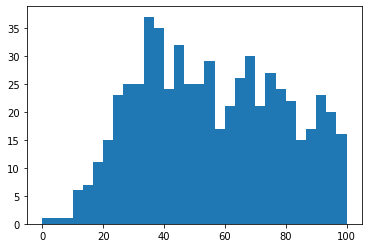

In [35]:
plt.hist(singles.J_SNR[singles.J_SNR<100],bins=30)

In [36]:
wave = singles['WAVE'][0]
wavegrid_list=list(wave)
wave = np.array(wave)
wavegrid=wave

In [37]:
df = pd.read_hdf(r'C:/Users/juand/Research/h5_files/standards_230801.h5').reset_index(drop=True)
STANDARDS = {
    "WAVE": df["WAVE"].iloc[0],
    "SPT": df["SPT"],
    "FLUX": df["FLUX"],
    "UNC": df["UNCERTAINTY"],
}

In [38]:
typenum=[]
for i in range(len(singles)):
    typenum.append(typeToNum(singles['SPT'][i]))
singles['SPT_NUM']=typenum
singles = singles.loc[singles['SPT_NUM']>15*np.ones(len(singles))]
singles = singles.reset_index(drop=True)
singles

,WAVE,FLUX,UNCERTAINTY,J_SNR,SPT,SPT_NUM
0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9660627713093847e-10, 2.1131039893243844e-1...","[5.982245325049133e-12, 5.755711185801827e-12,...",94.018303,M6.0,16.0
1,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9950771920752281e-10, 2.079591490944689e-10...","[7.703832533018333e-13, 1.0951267822400711e-12...",386.537811,M7.0,17.0
2,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9762911463072993e-10, 2.0580528498234088e-1...","[2.2989224859548107e-12, 2.3022679333025286e-1...",204.598099,M6.0,16.0
3,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.2878515319813078e-10, 2.370316420618723e-10...","[6.1214909391048044e-12, 6.136043777530829e-12...",91.589699,M6.0,16.0
4,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.0618668468240422e-10, 2.142866617637176e-10...","[1.0832266058640476e-12, 1.0976881329239517e-1...",414.787994,M6.0,16.0
...,...,...,...,...,...,...
1041,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.3139820970701434e-13, 1.246237555225135e-13...","[1.2961283330524777e-13, 1.2520460658453793e-1...",4.703918,T8.0,38.0
1042,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[5.244854443773445e-14, 6.580743947046151e-14,...","[3.029490952427518e-14, 2.968834229762724e-14,...",23.436972,T8.0,38.0
1043,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[-2.2614582467991454e-14, 5.872129739165835e-1...","[4.4876320743869606e-14, 4.616998222544605e-14...",13.918951,T8.0,38.0
1044,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.4678859815360097e-14, 1.7897430190283215e-1...","[6.009617385156795e-15, 6.170117985714561e-15,...",30.023281,T9.0,39.0


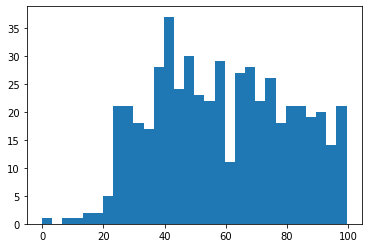

In [8]:
newsnr=[]
for i in range(len(singles)):
    flux=singles['FLUX'][i]
    uncer=singles['UNCERTAINTY'][i]
    newsnr.append(measureSN(wave,flux,uncer))
singles['J_SNR_2']=newsnr
plt.hist(singles.J_SNR_2[singles.J_SNR_2<100],bins=30)
singles.drop(['J_SNR_2'],axis=1,inplace=True)

In [9]:
snrclass=[]
for i in range(len(singles)):
    snrQ = singles['J_SNR'][i]
    if snrQ<50:
        snrclass.append('low')
    elif (snrQ>=50)&(snrQ<100):
        snrclass.append('mid')
    else:
        snrclass.append('hig')
singles['SNR_CLASS']=snrclass

In [10]:
drop_unc = []
for position, uncertainty_i in enumerate(np.array(singles['UNCERTAINTY'])):
    if np.any(uncertainty_i<0)|np.any(np.isnan(uncertainty_i))|np.any(np.isinf(uncertainty_i)):
        drop_unc.append(position)
singles = singles.drop(drop_unc).reset_index(drop=True)

In [11]:
singles

,WAVE,FLUX,UNCERTAINTY,J_SNR,SPT,SPT_NUM,SNR_CLASS
0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9660627713093847e-10, 2.1131039893243844e-1...","[5.982245325049133e-12, 5.755711185801827e-12,...",94.018303,M6.0,16.0,mid
1,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9950771920752281e-10, 2.079591490944689e-10...","[7.703832533018333e-13, 1.0951267822400711e-12...",386.537811,M7.0,17.0,hig
2,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9762911463072993e-10, 2.0580528498234088e-1...","[2.2989224859548107e-12, 2.3022679333025286e-1...",204.598099,M6.0,16.0,hig
3,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.2878515319813078e-10, 2.370316420618723e-10...","[6.1214909391048044e-12, 6.136043777530829e-12...",91.589699,M6.0,16.0,mid
4,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.0618668468240422e-10, 2.142866617637176e-10...","[1.0832266058640476e-12, 1.0976881329239517e-1...",414.787994,M6.0,16.0,hig
...,...,...,...,...,...,...,...
1018,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.3139820970701434e-13, 1.246237555225135e-13...","[1.2961283330524777e-13, 1.2520460658453793e-1...",4.703918,T8.0,38.0,low
1019,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[5.244854443773445e-14, 6.580743947046151e-14,...","[3.029490952427518e-14, 2.968834229762724e-14,...",23.436972,T8.0,38.0,low
1020,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[-2.2614582467991454e-14, 5.872129739165835e-1...","[4.4876320743869606e-14, 4.616998222544605e-14...",13.918951,T8.0,38.0,low
1021,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.4678859815360097e-14, 1.7897430190283215e-1...","[6.009617385156795e-15, 6.170117985714561e-15,...",30.023281,T9.0,39.0,low


In [12]:
def fast_classify2(
    wave,
    flux,
    unc,
    fit_range=[0.9, 2.4],
    standards=STANDARDS,
    telluric=False,
    method="full",
):

    if method == "kirkpatrick":
        fit_range = [0.9, 1.4]
    elif method == "full":
        fit_range = [0.9, 2.4]
    else:
        pass

    w = np.where(np.logical_and(wave >= fit_range[0], wave <= fit_range[1]))[0]

    scales, chi = [], []

    weights = np.ones(len(wave))

    if telluric == True:
        msk = np.ones(len(weights))
        msk[
            np.where(
                np.logical_or(
                    np.logical_and(wavegrid > 1.35, wavegrid < 1.42),
                    np.logical_and(wavegrid > 1.8, wavegrid < 1.95),
                )
            )
        ] = 0
        weights = weights * msk

    # Loop through standards
    for std in standards["FLUX"]:
        scale = np.nansum(weights * (flux * std) / (unc**2)) / np.nansum(
            (weights * std**2) / (unc**2)
        )
        scales.append(scale)
        chisquared = np.nansum(
            weights * ((flux - (std * scales[-1])) ** 2) / (unc**2)
        )
        chi.append(chisquared)
    
    return standards["SPT"][np.argmin(chi)]

In [13]:
s17low = singles[(singles.SPT_NUM==17)&(singles.SNR_CLASS=='low')].reset_index(drop=True)
f17low, u17low = normalize(wave,s17low.FLUX[1],s17low.UNCERTAINTY[1])
s24low = singles[(singles.SPT_NUM==24)&(singles.SNR_CLASS=='low')].reset_index(drop=True)
f24low, u24low = normalize(wave,s24low.FLUX[0],s24low.UNCERTAINTY[0])

s17mid = singles[(singles.SPT_NUM==17)&(singles.SNR_CLASS=='mid')].reset_index(drop=True)
f17mid, u17mid = normalize(wave,s17mid.FLUX[1],s17mid.UNCERTAINTY[1])
s24mid = singles[(singles.SPT_NUM==24)&(singles.SNR_CLASS=='mid')].reset_index(drop=True)
f24mid, u24mid = normalize(wave,s24mid.FLUX[1],s24mid.UNCERTAINTY[1])

s17hig = singles[(singles.SPT_NUM==17)&(singles.SNR_CLASS=='hig')].reset_index(drop=True)
f17hig, u17hig = normalize(wave,s17hig.FLUX[0],s17hig.UNCERTAINTY[0])
s24hig = singles[(singles.SPT_NUM==24)&(singles.SNR_CLASS=='hig')].reset_index(drop=True)
f24hig, u24hig = normalize(wave,s24hig.FLUX[0],s24hig.UNCERTAINTY[0])

In [14]:
binlow = f17low+f24low
ulow   = u17low+u24low
binlow, ulow = normalize(wave,binlow,ulow)
Slow = df[df.SPT==fast_classify2(wave,binlow,ulow)].reset_index(drop=True)
Sflow, Sulow = normalize(wave,Slow.FLUX[0],Slow.UNCERTAINTY[0])
dlow = binlow-Sflow

binmid = f17mid+f24mid
umid   = u17mid+u24mid
binmid, umid = normalize(wave,binmid,umid)
Smid = df[df.SPT==fast_classify2(wave,binmid,umid)].reset_index(drop=True)
Sfmid, Sumid = normalize(wave,Smid.FLUX[0],Smid.UNCERTAINTY[0])
dmid = binmid-Sfmid

binhig = f17hig+f24hig
uhig   = u17hig+u24hig
binhig, uhig = normalize(wave,binhig,uhig)
Shig = df[df.SPT==fast_classify2(wave,binhig,uhig)].reset_index(drop=True)
Sfhig, Suhig = normalize(wave,Shig.FLUX[0],Shig.UNCERTAINTY[0])
dhig = binhig-Sfhig

In [15]:
start = time.time()
flux_cols_dic = {}
for j in range(len(singles['FLUX'][0])):
    fluxcol=[]
    for i in range(len(singles)):
        fluxcol.append(singles['FLUX'][i][j])
    fluxname='FLUX_'+str(j)
    flux_cols_dic[fluxname] = fluxcol
flux_cols_df = pd.DataFrame(flux_cols_dic)
singles = pd.concat([singles, flux_cols_df], axis=1)

singles = singles.sort_values(by=['SPT_NUM','J_SNR'], ascending=[True,False])
singles.reset_index(drop=True, inplace=True)
end = time.time()

Multioutput Random Forest LOW snr (<50)

In [39]:
with open('data/BinDF_low.pickle', 'rb') as f:
        BinDF_low = pickle.load(f)

In [40]:
BinDF_low = BinDF_low[BinDF_low.primary_type!=16]
BinDF_low = BinDF_low[BinDF_low.primary_type<28]
BinDF_low = BinDF_low[BinDF_low.secondary_type>30]
BinDF_low = BinDF_low[BinDF_low.secondary_type<39]
BinDF_low.reset_index(drop=True,inplace=True)

In [41]:
with open('data/BinDF_low_Bard.pickle', 'wb') as f:
        pickle.dump(BinDF_low, f)

In [42]:
fastspt = [typeToNum(fast_classify(wave,fx,ns)) for fx, ns in zip(BinDF_low.system_interpolated_flux,BinDF_low.system_interpolated_noise)]
min(fastspt), max(fastspt)

(15.0, 39.0)

In [32]:
start = time.time()
MO_low, data_low = binary_multiOutput_classifier(BinDF_low,max_depth=25,n_estimators=50,testdata=True)
end = time.time()
print(end-start)

200.31315279006958


In [34]:
yput1 = []
yput2 = []
for i in data_low['y_test']:
    yput1.append(i[0])
    yput2.append(i[1])
data_low_df = pd.DataFrame(data_low['x_test'])
data_low_df['prim']=yput1
data_low_df['seco']=yput2
data_low_df.to_csv('data/data_low_Bard_50est.csv',index=False)

In [35]:
x_test_low = data_low['x_test']
y_test_low = data_low['y_test']
print(len(x_test_low))

5280


In [36]:
joblib.dump(MO_low, 'MOclassifiers/MO_low_Bard_50est.pkl')

['MOclassifiers/MO_low_Bard_50est.pkl']

In [37]:
# MO_low = joblib.load('MOclassifiers/MO_low_Bard_50est.pkl')

In [38]:
# df_data_low = pd.read_csv(r'data/data_low.csv')
# x_test_low = [[df_data_low[str(col)][i] for col in range(409)] for i in range(len(df_data_low))]
# y_test_low = [[df_data_low['prim'][i],df_data_low['seco'][i]] for i in range(len(df_data_low))]

In [39]:
start = time.time()
df_avgdiffprim_low, df_avgdiffseco_low, df_stdprim_low, df_stdseco_low, predsprim_low, predssec_low, realprim_low, realsec_low = binaryPrecision(x_test_low,y_test_low,MO_low, predictions=True)
end = time.time()
print(end-start)

22.679239988327026


0.05958833874458886


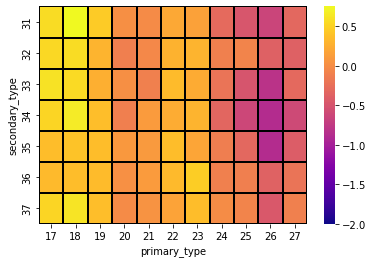

In [165]:
sns.heatmap(df_avgdiffprim_low.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-2,vmax=0.75)
print(df_avgdiffprim_low.mean(axis = 0, skipna = True).mean())

0.03689380884267282


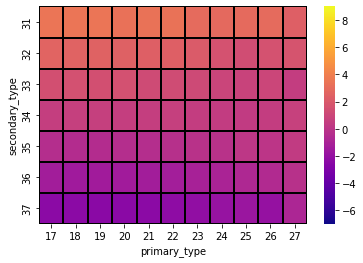

In [166]:
sns.heatmap(df_avgdiffseco_low.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-7,vmax=9)
print(df_avgdiffseco_low.mean(axis = 0, skipna = True).mean())

0.7448454821485352


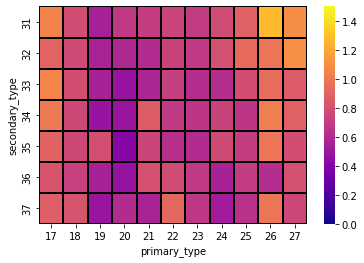

In [167]:
sns.heatmap(df_stdprim_low.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=1.5)
print(df_stdprim_low.mean(axis = 0, skipna = True).mean())

0.5679989131848373


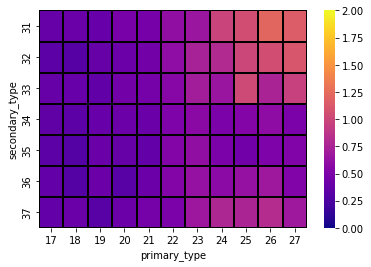

In [47]:
sns.heatmap(df_stdseco_low.drop([16,28,29,30,31,32,33,34,35,36,37,38,39],axis=1).drop([16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=2)
print(df_stdseco_low.mean(axis = 0, skipna = True).mean())

{'primary_type': {'wavegrid': [1.0466686,
   1.0546899,
   1.1078224,
   1.1119732,
   1.1161318,
   1.1202984,
   1.1665872,
   1.1708316,
   1.175081,
   1.1793355,
   2.0940266,
   2.0972888,
   2.1005466,
   2.1037998,
   2.1360815,
   2.1392844,
   2.1424825],
  'importance': [0.01254182158048388,
   0.029023961523897513,
   0.08895874562070927,
   0.04502496854109745,
   0.1321746491073011,
   0.010589410312437314,
   0.049864401477090384,
   0.19375226886754823,
   0.04162032959218884,
   0.022453734555832362,
   0.01563352181505978,
   0.01515615724594731,
   0.01415451200067846,
   0.010325397878480516,
   0.009830304317486629,
   0.019679258167653816,
   0.015924916724878946]},
 'secondary_type': {'wavegrid': [0.90129393,
   0.9047135,
   0.9081512,
   0.9116069,
   0.9150805,
   0.9185718,
   0.92208076,
   0.9256072,
   0.9291509,
   0.9327118,
   0.93628967,
   0.9398844,
   0.94349587,
   0.9471239,
   0.95076823,
   0.9544288,
   0.9581054,
   0.96179783,
   0.965506,
  

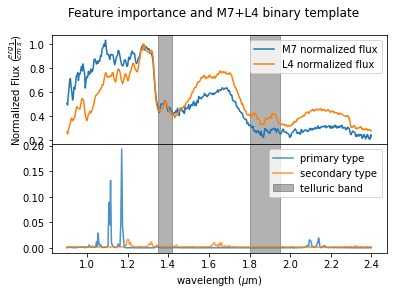

In [189]:
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(wavegrid,f17low)
ax[0].plot(wavegrid,f24low)
ax[0].set_ylabel('Normalized Flux ($\\frac{erg}{cm}\\frac{1}{s}$)')
ax[0].legend(['M7 normalized flux','L4 normalized flux'])

feat_impts_low = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in MO_low.estimators_:
    ax[1].plot(wavegrid,clf.feature_importances_, alpha=0.8)
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        dd.append(wavegrid[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)
ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].legend(['primary type', 'secondary type', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7+L4 binary template')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_low['primary_type']['wavegrid'] = ddd[0]
feat_impts_low['primary_type']['importance'] = eee[0]
feat_impts_low['secondary_type']['wavegrid'] = ddd[1]
feat_impts_low['secondary_type']['importance'] = eee[1]
feat_impts_low

In [49]:
precisionprim_low1, recallprim_low1, f1_scoreprim_low1, accuracyprim_low1 = calculate_metrics(realprim_low,predsprim_low,1)
precisionsec_low1, recallsec_low1, f1_scoresec_low1, accuracysec_low1 = calculate_metrics(realsec_low,predssec_low,1)
precisionprim_low3, recallprim_low3, f1_scoreprim_low3, accuracyprim_low3 = calculate_metrics(realprim_low,predsprim_low,3)
precisionsec_low3, recallsec_low3, f1_scoresec_low3, accuracysec_low3 = calculate_metrics(realsec_low,predssec_low,3)

In [50]:
with open('data/precisionprim_low1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_low1, file)
with open('data/recallprim_low1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_low1, file)
with open('data/f1_scoreprim_low1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_low1, file)
with open('data/accuracyprim_low1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_low1, file)

In [51]:
with open('data/precisionsec_low1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_low1, file)
with open('data/recallsec_low1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_low1, file)
with open('data/f1_scoresec_low1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_low1, file)
with open('data/accuracysec_low1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_low1, file)

In [52]:
with open('data/precisionprim_low3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_low3, file)
with open('data/recallprim_low3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_low3, file)
with open('data/f1_scoreprim_low3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_low3, file)
with open('data/accuracyprim_low3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_low3, file)

In [53]:
with open('data/precisionsec_low3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_low3, file)
with open('data/recallsec_low3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_low3, file)
with open('data/f1_scoresec_low3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_low3, file)
with open('data/accuracysec_low3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_low3, file)

Multioutput Random Fores MID snr (50<snr<100)

In [43]:
with open('data/BinDF_mid.pickle', 'rb') as f:
        BinDF_mid = pickle.load(f)

In [44]:
BinDF_mid = BinDF_mid[BinDF_mid.primary_type!=16]
BinDF_mid = BinDF_mid[BinDF_mid.primary_type<28]
BinDF_mid = BinDF_mid[BinDF_mid.secondary_type>30]
BinDF_mid = BinDF_mid[BinDF_mid.secondary_type<39]
BinDF_mid.reset_index(drop=True,inplace=True)

In [45]:
with open('data/BinDF_mid_Bard.pickle', 'wb') as f:
        pickle.dump(BinDF_mid, f)

In [46]:
fastspt = [typeToNum(fast_classify(wave,fx,ns)) for fx, ns in zip(BinDF_mid.system_interpolated_flux,BinDF_mid.system_interpolated_noise)]
min(fastspt), max(fastspt)

(16.0, 33.0)

In [58]:
start = time.time()
clfmid, data_mid = binary_multiOutput_classifier(BinDF_mid,max_depth=25,n_estimators=50,testdata=True)
end = time.time()
print(end-start)

216.4756121635437


In [59]:
x_test_mid = data_mid['x_test']
y_test_mid = data_mid['y_test']

In [60]:
yput1 = []
yput2 = []
for i in data_mid['y_test']:
    yput1.append(i[0])
    yput2.append(i[1])
data_mid_df = pd.DataFrame(data_mid['x_test'])
data_mid_df['prim']=yput1
data_mid_df['seco']=yput2
data_mid_df.to_csv('data/data_mid_Bard_50est.csv',index=False)

In [61]:
joblib.dump(clfmid, 'MOclassifiers/MO_mid_Bard_50est.pkl')

['MOclassifiers/MO_mid_Bard_50est.pkl']

In [62]:
MO_mid = joblib.load('MOclassifiers/MO_mid_Bard_50est.pkl')

In [63]:
# df_data_mid = pd.read_csv(r'data/data_mid.csv')
# x_test_mid = [[df_data_mid[str(col)][i] for col in range(409)] for i in range(len(df_data_mid))]
# y_test_mid = [[df_data_mid['prim'][i],df_data_mid['seco'][i]] for i in range(len(df_data_mid))]

In [64]:
start = time.time()
df_avgdiffprim_mid, df_avgdiffseco_mid, df_stdprim_mid, df_stdseco_mid, predsprim_mid, predssec_mid, realprim_mid, realsec_mid = binaryPrecision(x_test_mid,y_test_mid,MO_mid,predictions=True)
end = time.time()
print(end-start)

20.611217737197876


0.005299346875821464


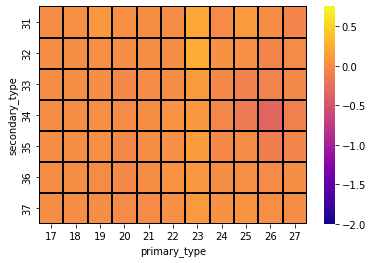

In [168]:
sns.heatmap(df_avgdiffprim_mid.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-2,vmax=0.75)
print(df_avgdiffprim_mid.mean(axis = 0, skipna = True).mean())

0.005573903158533042


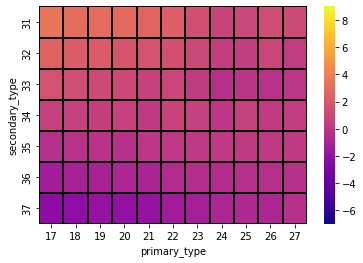

In [169]:
sns.heatmap(df_avgdiffseco_mid.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-7,vmax=9)
print(df_avgdiffseco_mid.mean(axis = 0, skipna = True).mean())

0.27727004438078223


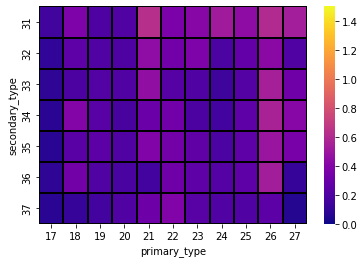

In [170]:
sns.heatmap(df_stdprim_mid.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=1.5)
print(df_stdprim_mid.mean(axis = 0, skipna = True).mean())

0.6533792803311141


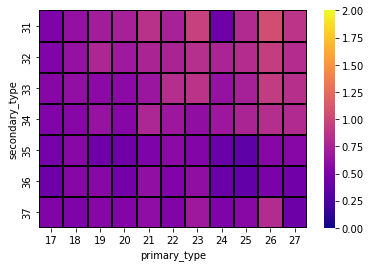

In [171]:
sns.heatmap(df_stdseco_mid.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=2)
print(df_stdseco_mid.mean(axis = 0, skipna = True).mean())

{'primary_type': {'wavegrid': [1.0546899, 1.0954207],
  'importance': [0.046769523387252085, 0.7255794774724958]},
 'secondary_type': {'wavegrid': [1.1921266,
   1.196399,
   1.2006752,
   1.2049553,
   1.2092391,
   1.2135262,
   1.2608577,
   1.2651716,
   1.2694867,
   1.2738026,
   1.2781193,
   1.2824366,
   1.2867544,
   1.2910724,
   1.2953905,
   1.2997085,
   1.3040264,
   1.3083439,
   1.3126608,
   1.3169771,
   1.3212926,
   1.3256073,
   1.3428532,
   1.3471608,
   1.3514667,
   1.3557706,
   1.424271,
   1.4327725,
   1.4370172,
   1.4412577,
   1.4581763,
   1.4666083,
   1.4708171,
   1.5661474,
   1.594543,
   1.6025993,
   1.6066179,
   1.61063,
   1.6146357,
   1.618635,
   1.6226279,
   1.6266141,
   1.630594,
   1.6345673,
   1.6385341,
   1.6424943,
   1.646448,
   1.6503952,
   1.6543357,
   1.6582698,
   1.6621974,
   1.6661183,
   1.6700326,
   1.6739404,
   1.6778415,
   1.6856244,
   1.6933808,
   1.784445,
   2.2544086,
   2.2754152,
   2.2783954,
   2.28434

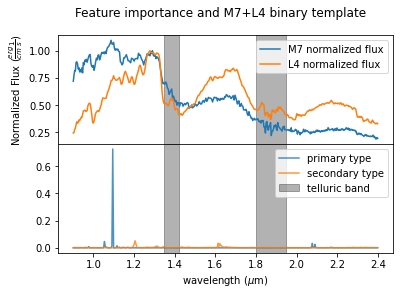

In [188]:
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(wavegrid,f17mid)
ax[0].plot(wavegrid,f24mid)
ax[0].set_ylabel('Normalized Flux ($\\frac{erg}{cm}\\frac{1}{s}$)')
ax[0].legend(['M7 normalized flux','L4 normalized flux'])

feat_impts_mid = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in MO_mid.estimators_:
    ax[1].plot(wavegrid,clf.feature_importances_, alpha=0.8)
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        dd.append(wavegrid[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)
ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].legend(['primary type', 'secondary type', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7+L4 binary template')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_mid['primary_type']['wavegrid'] = ddd[0]
feat_impts_mid['primary_type']['importance'] = eee[0]
feat_impts_mid['secondary_type']['wavegrid'] = ddd[1]
feat_impts_mid['secondary_type']['importance'] = eee[1]
feat_impts_mid

In [70]:
precisionprim_mid1, recallprim_mid1, f1_scoreprim_mid1, accuracyprim_mid1 = calculate_metrics(realprim_mid,predsprim_mid,1)
precisionsec_mid1, recallsec_mid1, f1_scoresec_mid1, accuracysec_mid1 = calculate_metrics(realsec_mid,predssec_mid,1)
precisionprim_mid3, recallprim_mid3, f1_scoreprim_mid3, accuracyprim_mid3 = calculate_metrics(realprim_mid,predsprim_mid,3)
precisionsec_mid3, recallsec_mid3, f1_scoresec_mid3, accuracysec_mid3 = calculate_metrics(realsec_mid,predssec_mid,3)

In [71]:
with open('data/precisionprim_mid1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_mid1, file)
with open('data/recallprim_mid1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_mid1, file)
with open('data/f1_scoreprim_mid1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_mid1, file)
with open('data/accuracyprim_mid1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_mid1, file)

In [72]:
with open('data/precisionsec_mid1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_mid1, file)
with open('data/recallsec_mid1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_mid1, file)
with open('data/f1_scoresec_mid1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_mid1, file)
with open('data/accuracysec_mid1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_mid1, file)

In [73]:
with open('data/precisionprim_mid3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_mid3, file)
with open('data/recallprim_mid3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_mid3, file)
with open('data/f1_scoreprim_mid3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_mid3, file)
with open('data/accuracyprim_mid3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_mid3, file)

In [74]:
with open('data/precisionsec_mid3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_mid3, file)
with open('data/recallsec_mid3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_mid3, file)
with open('data/f1_scoresec_mid3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_mid3, file)
with open('data/accuracysec_mid3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_mid3, file)

Multioutput Random Forest HIG snr (>100)

In [47]:
with open('data/BinDF_hig.pickle', 'rb') as f:
        BinDF_hig = pickle.load(f)

In [48]:
BinDF_hig = BinDF_hig[BinDF_hig.primary_type!=16]
BinDF_hig = BinDF_hig[BinDF_hig.primary_type<28]
BinDF_hig = BinDF_hig[BinDF_hig.secondary_type>30]
BinDF_hig = BinDF_hig[BinDF_hig.secondary_type<39]
BinDF_hig.reset_index(drop=True,inplace=True)

In [49]:
with open('data/BinDF_hig_Bard.pickle', 'wb') as f:
        pickle.dump(BinDF_hig, f)

In [51]:
fastspt = [typeToNum(fast_classify(wave,fx,ns)) for fx, ns in zip(BinDF_hig.system_interpolated_flux,BinDF_hig.system_interpolated_noise)]
min(fastspt), max(fastspt)

(17.0, 33.0)

Text(0.5, 1.0, 'SNR Distribution')

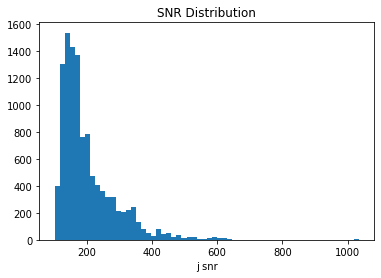

In [78]:
fig, axe = plt.subplots()
axe.hist(BinDF_hig['J_SNR'],bins=60)
plt.xlabel('j snr')
plt.title('SNR Distribution')

In [79]:
start = time.time()
clfhig, data_hig = binary_multiOutput_classifier(BinDF_hig,max_depth=25,n_estimators=50,testdata=True)
end = time.time()
print(end-start)

108.93610143661499


In [80]:
yput1 = []
yput2 = []
for i in data_hig['y_test']:
    yput1.append(i[0])
    yput2.append(i[1])
data_hig_df = pd.DataFrame(data_hig['x_test'])
data_hig_df['prim']=yput1
data_hig_df['seco']=yput2
data_hig_df
data_hig_df.to_csv('data/data_hig_Bard_50est.csv',index=False)

In [81]:
x_test_hig = data_hig['x_test']
y_test_hig = data_hig['y_test']

In [82]:
joblib.dump(clfhig, 'MOclassifiers/MO_hig_Bard_50est.pkl')

['MOclassifiers/MO_hig_Bard_50est.pkl']

In [83]:
MO_hig = joblib.load('MOclassifiers/MO_hig_Bard_50est.pkl')

In [84]:
# df_data_hig = pd.read_csv(r'data/data_hig.csv')
# x_test_hig = [[df_data_hig[str(col)][i] for col in range(409)] for i in range(len(df_data_hig))]
# y_test_hig = [[df_data_hig['prim'][i],df_data_hig['seco'][i]] for i in range(len(df_data_hig))]

In [85]:
start = time.time()
df_avgdiffprim_hig, df_avgdiffseco_hig, df_stdprim_hig, df_stdseco_hig, predsprim_hig, predssec_hig, realprim_hig, realsec_hig = binaryPrecision(x_test_hig,y_test_hig,MO_hig, predictions=True)
end = time.time()
print(end-start)

13.458523988723755


0.002110606060606364


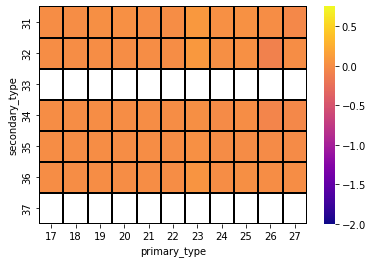

In [172]:
sns.heatmap(df_avgdiffprim_hig.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-2,vmax=0.75)
print(df_avgdiffprim_hig.mean(axis = 0, skipna = True).mean())

-0.0010536400092924212


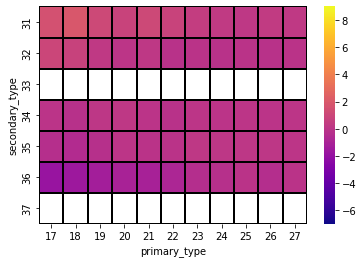

In [173]:
sns.heatmap(df_avgdiffseco_hig.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-7,vmax=9)
print(df_avgdiffseco_hig.mean(axis = 0, skipna = True).mean())

0.17826620517478323


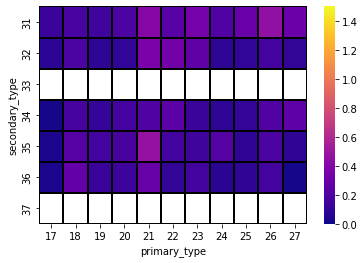

In [174]:
sns.heatmap(df_stdprim_hig.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=1.5)
print(df_stdprim_hig.mean(axis = 0, skipna = True).mean())

0.42352232534603346


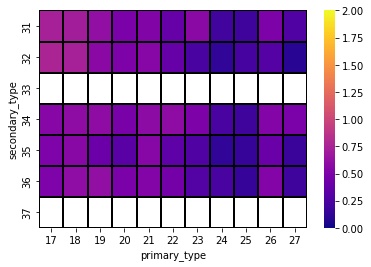

In [175]:
sns.heatmap(df_stdseco_hig.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=2)
print(df_stdseco_hig.mean(axis = 0, skipna = True).mean())

{'primary_type': {'wavegrid': [0.9256072,
   0.9291509,
   0.96922964,
   1.0913042,
   1.0954207],
  'importance': [0.022393275223992388,
   0.058031780298869205,
   0.029694379697319185,
   0.25131473843367935,
   0.43065417635255104]},
 'secondary_type': {'wavegrid': [1.1244725,
   1.1878585,
   1.2006752,
   1.2049553,
   1.3212926,
   1.424271,
   1.6226279,
   1.6266141,
   1.630594,
   1.6345673,
   1.6385341,
   1.6424943,
   1.6739404,
   1.6778415,
   2.0244722,
   2.037875],
  'importance': [0.009251832086139685,
   0.009050924108888754,
   0.11139266377582857,
   0.06243273440744156,
   0.014611951891442687,
   0.010982502611547255,
   0.023877765969454803,
   0.13899609597068247,
   0.0451342620050033,
   0.0173075299924188,
   0.015844110610112084,
   0.007776265280053473,
   0.008402732459958897,
   0.014592877644395277,
   0.008130942861155647,
   0.008265022915194563]}}

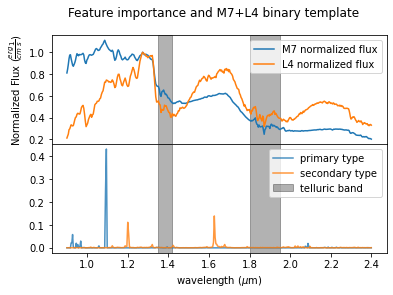

In [190]:
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(wavegrid,f17hig)
ax[0].plot(wavegrid,f24hig)
ax[0].set_ylabel('Normalized Flux ($\\frac{erg}{cm}\\frac{1}{s}$)')
ax[0].legend(['M7 normalized flux','L4 normalized flux'])

feat_impts_hig = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in clfhig.estimators_:
    ax[1].plot(wavegrid,clf.feature_importances_, alpha=0.8)
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        dd.append(wavegrid[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)
ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].legend(['primary type', 'secondary type', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7+L4 binary template')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_hig['primary_type']['wavegrid'] = ddd[0]
feat_impts_hig['primary_type']['importance'] = eee[0]
feat_impts_hig['secondary_type']['wavegrid'] = ddd[1]
feat_impts_hig['secondary_type']['importance'] = eee[1]
feat_impts_hig

In [91]:
precisionprim_hig1, recallprim_hig1, f1_scoreprim_hig1, accuracyprim_hig1 = calculate_metrics(realprim_hig,predsprim_hig,1)
precisionsec_hig1, recallsec_hig1, f1_scoresec_hig1, accuracysec_hig1 = calculate_metrics(realsec_hig,predssec_hig,1)
precisionprim_hig3, recallprim_hig3, f1_scoreprim_hig3, accuracyprim_hig3 = calculate_metrics(realprim_hig,predsprim_hig,3)
precisionsec_hig3, recallsec_hig3, f1_scoresec_hig3, accuracysec_hig3 = calculate_metrics(realsec_hig,predssec_hig,3)

In [92]:
with open('data/precisionprim_hig1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_hig1, file)
with open('data/recallprim_hig1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_hig1, file)
with open('data/f1_scoreprim_hig1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_hig1, file)
with open('data/accuracyprim_hig1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_hig1, file)

In [93]:
with open('data/precisionsec_hig1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_hig1, file)
with open('data/recallsec_hig1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_hig1, file)
with open('data/f1_scoresec_hig1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_hig1, file)
with open('data/accuracysec_hig1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_hig1, file)

In [94]:
with open('data/precisionprim_hig3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_hig3, file)
with open('data/recallprim_hig3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_hig3, file)
with open('data/f1_scoreprim_hig3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_hig3, file)
with open('data/accuracyprim_hig3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_hig3, file)

In [95]:
with open('data/precisionsec_hig3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_hig3, file)
with open('data/recallsec_hig3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_hig3, file)
with open('data/f1_scoresec_hig3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_hig3, file)
with open('data/accuracysec_hig3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_hig3, file)

Including Difference Spectrum

Low

In [96]:
with open('data/BinDF_low_d.pickle', 'rb') as f:
        BinDF_low_d = pickle.load(f)

In [97]:
BinDF_low_d = BinDF_low_d[BinDF_low_d.primary_type!=16]
BinDF_low_d = BinDF_low_d[BinDF_low_d.primary_type<28]
BinDF_low_d = BinDF_low_d[BinDF_low_d.secondary_type>30]
BinDF_low_d = BinDF_low_d[BinDF_low_d.secondary_type<39]
BinDF_low_d.reset_index(drop=True,inplace=True)

In [98]:
with open('data/BinDF_low_d_Bard.pickle', 'wb') as f:
        pickle.dump(BinDF_low_d, f)

Text(0.5, 1.0, 'SNR Distribution')

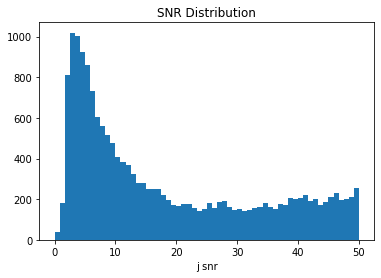

In [99]:
fig, axe = plt.subplots()
axe.hist(BinDF_low_d['J_SNR'],bins=60)
plt.xlabel('j snr')
plt.title('SNR Distribution')

In [100]:
start = time.time()
clflow_d, data_low_d = binary_multiOutput_classifier(BinDF_low_d,difference=True,max_depth=25,n_estimators=50,testdata=True)
end = time.time()
print(end-start)

425.4574131965637


In [101]:
yput1 = []
yput2 = []
for i in data_low_d['y_test']:
    yput1.append(i[0])
    yput2.append(i[1])
data_low_d_df = pd.DataFrame(data_low_d['x_test'])
data_low_d_df['prim']=yput1
data_low_d_df['seco']=yput2
data_low_d_df.to_csv('data/data_low_d_Bard_50est.csv',index=False)

In [102]:
x_test_low_d = data_low_d['x_test']
y_test_low_d = data_low_d['y_test']

In [103]:
joblib.dump(clflow_d, 'MOclassifiers/MO_low_d_Bard_50est.pkl')

['MOclassifiers/MO_low_d_Bard_50est.pkl']

In [104]:
MO_low_d = joblib.load('MOclassifiers/MO_low_d_Bard_50est.pkl')

In [105]:
# df_data_low_d = pd.read_csv(r'data/data_low_d.csv')
# x_test_low_d = [[df_data_low_d[str(col)][i] for col in range(818)] for i in range(len(df_data_low_d))]
# y_test_low_d = [[df_data_low_d['prim'][i],df_data_low_d['seco'][i]] for i in range(len(df_data_low_d))]

In [106]:
start = time.time()
df_avgdiffprim_low_d, df_avgdiffseco_low_d, df_stdprim_low_d, df_stdseco_low_d, predsprim_low_d, predssec_low_d, realprim_low_d, realsec_low_d = binaryPrecision(x_test_low_d,y_test_low_d,MO_low_d, predictions=True)
end = time.time()
print(end-start)

21.125242233276367


-0.0025158850280271924


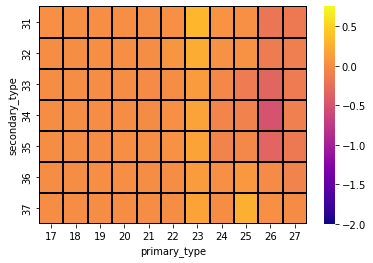

In [176]:
sns.heatmap(df_avgdiffprim_low_d.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-2,vmax=0.75)
print(df_avgdiffprim_low_d.mean(axis = 0, skipna = True).mean())

0.0074470583267120475


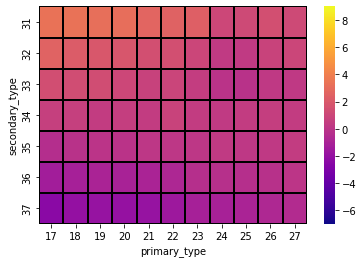

In [177]:
sns.heatmap(df_avgdiffseco_low_d.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-7,vmax=9)
print(df_avgdiffseco_low_d.mean(axis = 0, skipna = True).mean())

0.29238234336127583


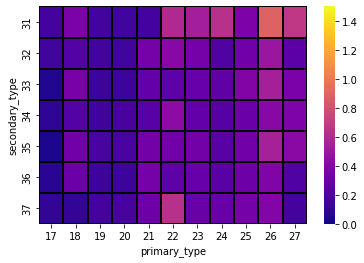

In [178]:
sns.heatmap(df_stdprim_low_d.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=1.5)
print(df_stdprim_low_d.mean(axis = 0, skipna = True).mean())

0.6723634337768938


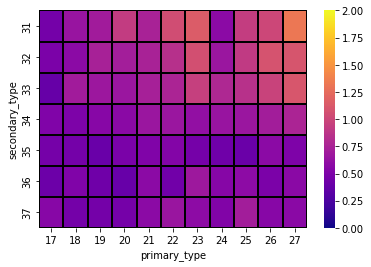

In [179]:
sns.heatmap(df_stdseco_low_d.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=2)
print(df_stdseco_low_d.mean(axis = 0, skipna = True).mean())

{'primary_type': {'wavegrid': [0.9471239,
   0.97296864,
   1.0668035,
   1.0913042,
   1.0954207,
   1.099546],
  'importance': [0.023206218560021447,
   0.030091211351806566,
   0.022063206238930592,
   0.4122608920437033,
   0.10311958284879008,
   0.1763225742492186]},
 'secondary_type': {'wavegrid': [0.9116069,
   1.1921266,
   1.196399,
   1.2006752,
   1.2049553,
   1.2092391,
   1.2135262,
   1.2178166,
   1.22211,
   1.2608577,
   1.2651716,
   1.2694867,
   1.3040264,
   1.3083439,
   1.3126608,
   1.3169771,
   1.3212926,
   1.3428532,
   1.3471608,
   1.3514667,
   1.3557706,
   1.3986764,
   1.4285238,
   1.4370172,
   1.4497259,
   1.61063,
   1.6146357,
   1.618635,
   1.6226279,
   1.6266141,
   1.630594,
   1.6345673,
   1.6385341,
   1.6424943,
   1.646448,
   1.6503952,
   1.6543357,
   1.6582698,
   1.6621974,
   1.6739404,
   1.7657748,
   1.8066466],
  'importance': [0.002686674125051276,
   0.0029181213070086746,
   0.015943355204350928,
   0.03428730110722156,
 

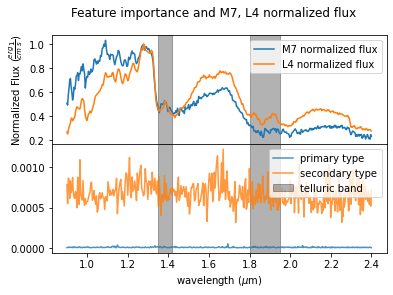

In [111]:
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(wavegrid,f17low)
ax[0].plot(wavegrid,f24low)
ax[0].set_ylabel('Normalized Flux ($\\frac{erg}{cm}\\frac{1}{s}$)')
ax[0].legend(['M7 normalized flux','L4 normalized flux'])

feat_impts_low_d = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in MO_low_d.estimators_:
    ax[1].plot(wavegrid,clf.feature_importances_[:409], alpha=0.8)
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        wavegrid2 = list(wavegrid)+list(wavegrid)
        dd.append(wavegrid2[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)

ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].legend(['primary type', 'secondary type', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7, L4 normalized flux')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_low_d['primary_type']['wavegrid'] = ddd[0]
feat_impts_low_d['primary_type']['importance'] = eee[0]
feat_impts_low_d['secondary_type']['wavegrid'] = ddd[1]
feat_impts_low_d['secondary_type']['importance'] = eee[1]
feat_impts_low_d

{'primary_type': {'wavegrid': [0.9471239,
   0.97296864,
   1.0668035,
   1.0913042,
   1.0954207,
   1.099546],
  'importance': [0.023206218560021447,
   0.030091211351806566,
   0.022063206238930592,
   0.4122608920437033,
   0.10311958284879008,
   0.1763225742492186]},
 'secondary_type': {'wavegrid': [0.9116069,
   1.1921266,
   1.196399,
   1.2006752,
   1.2049553,
   1.2092391,
   1.2135262,
   1.2178166,
   1.22211,
   1.2608577,
   1.2651716,
   1.2694867,
   1.3040264,
   1.3083439,
   1.3126608,
   1.3169771,
   1.3212926,
   1.3428532,
   1.3471608,
   1.3514667,
   1.3557706,
   1.3986764,
   1.4285238,
   1.4370172,
   1.4497259,
   1.61063,
   1.6146357,
   1.618635,
   1.6226279,
   1.6266141,
   1.630594,
   1.6345673,
   1.6385341,
   1.6424943,
   1.646448,
   1.6503952,
   1.6543357,
   1.6582698,
   1.6621974,
   1.6739404,
   1.7657748,
   1.8066466],
  'importance': [0.002686674125051276,
   0.0029181213070086746,
   0.015943355204350928,
   0.03428730110722156,
 

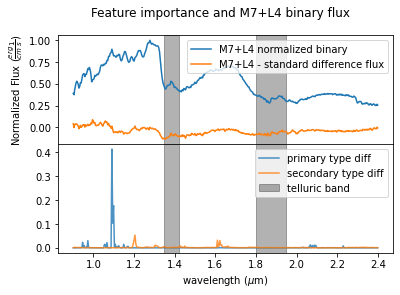

In [112]:
fig, ax = plt.subplots(2,1,sharex=True)


ax[0].plot(wavegrid,binlow)
ax[0].plot(wavegrid,dlow)
ax[0].set_ylabel('Normalized Flux ($\\frac{erg}{cm}\\frac{1}{s}$)')
ax[0].legend(['M7+L4 normalized binary','M7+L4 - standard difference flux'])

feat_impts_low_d = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in MO_low_d.estimators_:
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        wavegrid2 = list(wavegrid)+list(wavegrid)
        dd.append(wavegrid2[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)

for clf in MO_low_d.estimators_:
    ax[1].plot(wavegrid,clf.feature_importances_[409:], alpha=0.8)

ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].legend(['primary type diff', 'secondary type diff', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7+L4 binary flux')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_low_d['primary_type']['wavegrid'] = ddd[0]
feat_impts_low_d['primary_type']['importance'] = eee[0]
feat_impts_low_d['secondary_type']['wavegrid'] = ddd[1]
feat_impts_low_d['secondary_type']['importance'] = eee[1]
feat_impts_low_d

In [113]:
precisionprim_lowd1, recallprim_lowd1, f1_scoreprim_lowd1, accuracyprim_lowd1 = calculate_metrics(realprim_low_d,predsprim_low_d,1)
precisionsec_lowd1, recallsec_lowd1, f1_scoresec_lowd1, accuracysec_lowd1 = calculate_metrics(realsec_low_d,predssec_low_d,1)
precisionprim_lowd3, recallprim_lowd3, f1_scoreprim_lowd3, accuracyprim_lowd3 = calculate_metrics(realprim_low_d,predsprim_low_d,3)
precisionsec_lowd3, recallsec_lowd3, f1_scoresec_lowd3, accuracysec_lowd3 = calculate_metrics(realsec_low_d,predssec_low_d,3)

In [114]:
with open('data/precisionprim_lowd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_lowd1, file)
with open('data/recallprim_lowd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_lowd1, file)
with open('data/f1_scoreprim_lowd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_lowd1, file)
with open('data/accuracyprim_lowd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_lowd1, file)

In [115]:
with open('data/precisionsec_lowd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_lowd1, file)
with open('data/recallsec_lowd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_lowd1, file)
with open('data/f1_scoresec_lowd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_lowd1, file)
with open('data/accuracysec_lowd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_lowd1, file)

In [116]:
with open('data/precisionprim_lowd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_lowd3, file)
with open('data/recallprim_lowd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_lowd3, file)
with open('data/f1_scoreprim_lowd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_lowd3, file)
with open('data/accuracyprim_lowd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_lowd3, file)

In [117]:
with open('data/precisionsec_lowd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_lowd3, file)
with open('data/recallsec_lowd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_lowd3, file)
with open('data/f1_scoresec_lowd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_lowd3, file)
with open('data/accuracysec_lowd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_lowd3, file)

DIFFERENCE

Mid Snr

In [118]:
with open('data/BinDF_mid_d.pickle', 'rb') as f:
        BinDF_mid_d = pickle.load(f)

In [119]:
BinDF_mid_d = BinDF_mid_d[BinDF_mid_d.primary_type!=16]
BinDF_mid_d = BinDF_mid_d[BinDF_mid_d.primary_type<28]
BinDF_mid_d = BinDF_mid_d[BinDF_mid_d.secondary_type>30]
BinDF_mid_d = BinDF_mid_d[BinDF_mid_d.secondary_type<39]
BinDF_mid_d.reset_index(drop=True,inplace=True)

In [120]:
with open('data/BinDF_mid_d_Bard.pickle', 'wb') as f:
        pickle.dump(BinDF_mid_d, f)

Text(0.5, 1.0, 'SNR Distribution')

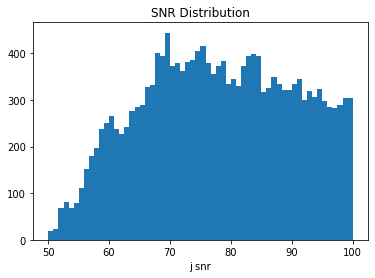

In [121]:
fig, axe = plt.subplots()
axe.hist(BinDF_mid_d['J_SNR'],bins=60)
plt.xlabel('j snr')
plt.title('SNR Distribution')

In [122]:
start = time.time()
clfmid_d, data_mid_d = binary_multiOutput_classifier(BinDF_mid_d,difference=True,max_depth=25,n_estimators=50,testdata=True)
end = time.time()
print(end-start)

414.6358768939972


In [123]:
yput1 = []
yput2 = []
for i in data_mid_d['y_test']:
    yput1.append(i[0])
    yput2.append(i[1])
data_mid_d_df = pd.DataFrame(data_mid_d['x_test'])
data_mid_d_df['prim']=yput1
data_mid_d_df['seco']=yput2
data_mid_d_df.to_csv('data/data_mid_d_Bard_50est.csv',index=False)

In [124]:
x_test_mid_d = data_mid_d['x_test']
y_test_mid_d = data_mid_d['y_test']

In [125]:
joblib.dump(clfmid_d, 'MOclassifiers/MO_mid_d_Bard_50est.pkl')

['MOclassifiers/MO_mid_d_Bard_50est.pkl']

In [126]:
# MO_mid_d = joblib.load('MOclassifiers/MO_mid_d_Bard_50est.pkl')

In [127]:
# df_data_mid_d = pd.read_csv(r'data/data_mid_d.csv')
# x_test_mid_d = [[df_data_mid_d[str(col)][i] for col in range(818)] for i in range(len(df_data_mid_d))]
# y_test_mid_d = [[df_data_mid_d['prim'][i],df_data_mid_d['seco'][i]] for i in range(len(df_data_mid_d))]

In [128]:
start = time.time()
df_avgdiffprim_mid_d, df_avgdiffseco_mid_d, df_stdprim_mid_d, df_stdseco_mid_d, predsprim_mid_d, predssec_mid_d, realprim_mid_d, realsec_mid_d = binaryPrecision(x_test_mid_d,y_test_mid_d,clfmid_d, predictions=True)
end = time.time()
print(end-start)

21.93805980682373


0.00638667725873118


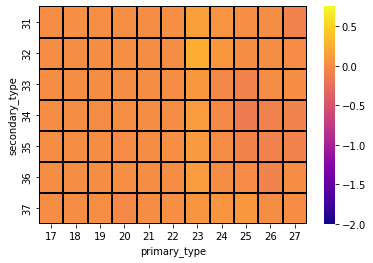

In [180]:
sns.heatmap(df_avgdiffprim_mid_d.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-2,vmax=0.75)
print(df_avgdiffprim_mid_d.mean(axis = 0, skipna = True).mean())

-0.003902498505596491


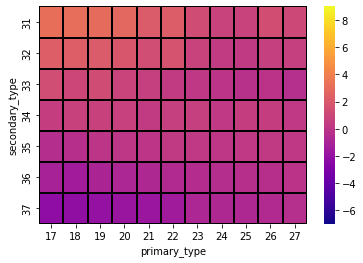

In [181]:
sns.heatmap(df_avgdiffseco_mid_d.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-7,vmax=9)
print(df_avgdiffseco_mid_d.mean(axis = 0, skipna = True).mean())

0.2462327711794521


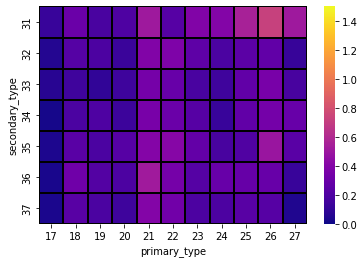

In [182]:
sns.heatmap(df_stdprim_mid_d.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=1.5)
print(df_stdprim_mid_d.mean(axis = 0, skipna = True).mean())

0.6754573374194943


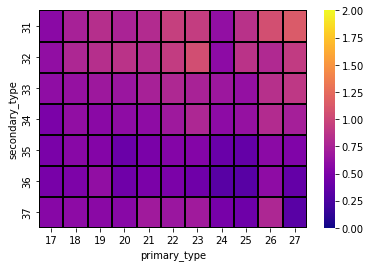

In [183]:
sns.heatmap(df_stdseco_mid_d.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=2)
print(df_stdseco_mid_d.mean(axis = 0, skipna = True).mean())

{'primary_type': {'wavegrid': [1.0546899,
   1.0913042,
   1.0954207,
   1.099546,
   2.077647],
  'importance': [0.04897453378170265,
   0.5912924012200241,
   0.10429884640322584,
   0.04434911805363128,
   0.0366457981635418]},
 'secondary_type': {'wavegrid': [1.3428532,
   1.6146357,
   1.6226279,
   1.6266141,
   1.6345673,
   1.2006752,
   1.3040264,
   1.3083439,
   1.3126608,
   1.3428532,
   1.3557706,
   1.6226279,
   1.6266141,
   1.630594,
   1.6345673,
   1.6385341],
  'importance': [0.006314400568802122,
   0.010057793083967887,
   0.03535390282777456,
   0.007975071388892536,
   0.007271033732115205,
   0.10279400512974139,
   0.00824037941041294,
   0.009300192510145544,
   0.012017411288262256,
   0.014056087653878866,
   0.011485601062056134,
   0.023343104127594376,
   0.009445521649485733,
   0.00524651356443994,
   0.008258270268710115,
   0.009476580667227409]}}

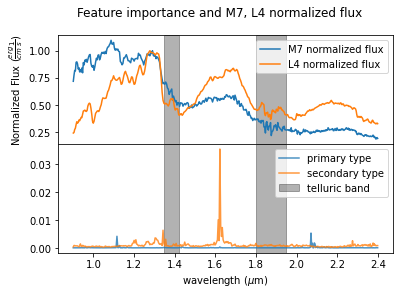

In [133]:
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(wavegrid,f17mid)
ax[0].plot(wavegrid,f24mid)
ax[0].set_ylabel('Normalized Flux ($\\frac{erg}{cm}\\frac{1}{s}$)')
ax[0].legend(['M7 normalized flux','L4 normalized flux'])

feat_impts_mid_d = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in clfmid_d.estimators_:
    ax[1].plot(wavegrid,clf.feature_importances_[:409], alpha=0.8)
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        wavegrid2 = list(wavegrid)+list(wavegrid)
        dd.append(wavegrid2[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)

ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].legend(['primary type', 'secondary type', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7, L4 normalized flux')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_mid_d['primary_type']['wavegrid'] = ddd[0]
feat_impts_mid_d['primary_type']['importance'] = eee[0]
feat_impts_mid_d['secondary_type']['wavegrid'] = ddd[1]
feat_impts_mid_d['secondary_type']['importance'] = eee[1]
feat_impts_mid_d

{'primary_type': {'wavegrid': [1.0546899,
   1.0913042,
   1.0954207,
   1.099546,
   2.077647],
  'importance': [0.04897453378170265,
   0.5912924012200241,
   0.10429884640322584,
   0.04434911805363128,
   0.0366457981635418]},
 'secondary_type': {'wavegrid': [1.3428532,
   1.6146357,
   1.6226279,
   1.6266141,
   1.6345673,
   1.2006752,
   1.3040264,
   1.3083439,
   1.3126608,
   1.3428532,
   1.3557706,
   1.6226279,
   1.6266141,
   1.630594,
   1.6345673,
   1.6385341],
  'importance': [0.006314400568802122,
   0.010057793083967887,
   0.03535390282777456,
   0.007975071388892536,
   0.007271033732115205,
   0.10279400512974139,
   0.00824037941041294,
   0.009300192510145544,
   0.012017411288262256,
   0.014056087653878866,
   0.011485601062056134,
   0.023343104127594376,
   0.009445521649485733,
   0.00524651356443994,
   0.008258270268710115,
   0.009476580667227409]}}

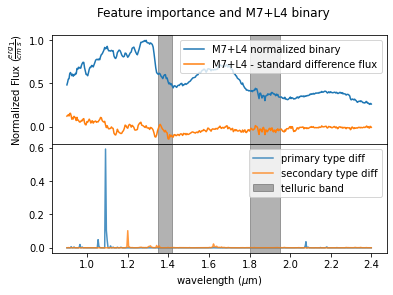

In [134]:
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(wavegrid,binmid)
ax[0].plot(wavegrid,dmid)
ax[0].set_ylabel('Normalized Flux ($\\frac{erg}{cm}\\frac{1}{s}$)')
ax[0].legend(['M7+L4 normalized binary','M7+L4 - standard difference flux'])

feat_impts_mid_d = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in clfmid_d.estimators_:
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        wavegrid2 = list(wavegrid)+list(wavegrid)
        dd.append(wavegrid2[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)

for clf in clfmid_d.estimators_:
    ax[1].plot(wavegrid,clf.feature_importances_[409:], alpha=0.8)

ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].legend(['primary type diff', 'secondary type diff', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7+L4 binary')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_mid_d['primary_type']['wavegrid'] = ddd[0]
feat_impts_mid_d['primary_type']['importance'] = eee[0]
feat_impts_mid_d['secondary_type']['wavegrid'] = ddd[1]
feat_impts_mid_d['secondary_type']['importance'] = eee[1]
feat_impts_mid_d

In [135]:
precisionprim_midd1, recallprim_midd1, f1_scoreprim_midd1, accuracyprim_midd1 = calculate_metrics(realprim_mid_d,predsprim_mid_d,1)
precisionsec_midd1, recallsec_midd1, f1_scoresec_midd1, accuracysec_midd1 = calculate_metrics(realsec_mid_d,predssec_mid_d,1)
precisionprim_midd3, recallprim_midd3, f1_scoreprim_midd3, accuracyprim_midd3 = calculate_metrics(realprim_mid_d,predsprim_mid_d,3)
precisionsec_midd3, recallsec_midd3, f1_scoresec_midd3, accuracysec_midd3 = calculate_metrics(realsec_mid_d,predssec_mid_d,3)

In [136]:
with open('data/precisionprim_midd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_midd1, file)
with open('data/recallprim_midd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_midd1, file)
with open('data/f1_scoreprim_midd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_midd1, file)
with open('data/accuracyprim_midd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_midd1, file)

In [137]:
with open('data/precisionsec_midd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_midd1, file)
with open('data/recallsec_midd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_midd1, file)
with open('data/f1_scoresec_midd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_midd1, file)
with open('data/accuracysec_midd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_midd1, file)

In [138]:
with open('data/precisionprim_midd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_midd3, file)
with open('data/recallprim_midd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_midd3, file)
with open('data/f1_scoreprim_midd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_midd3, file)
with open('data/accuracyprim_midd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_midd3, file)

In [139]:
with open('data/precisionsec_midd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_midd3, file)
with open('data/recallsec_midd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_midd3, file)
with open('data/f1_scoresec_midd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_midd3, file)
with open('data/accuracysec_midd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_midd3, file)

DIFFERENCE

Hig Snr

In [140]:
with open('data/BinDF_hig_d.pickle', 'rb') as f:
        BinDF_hig_d = pickle.load(f)

In [141]:
BinDF_hig_d = BinDF_hig_d[BinDF_hig_d.primary_type!=16]
BinDF_hig_d = BinDF_hig_d[BinDF_hig_d.primary_type<28]
BinDF_hig_d = BinDF_hig_d[BinDF_hig_d.secondary_type>30]
BinDF_hig_d = BinDF_hig_d[BinDF_hig_d.secondary_type<39]
BinDF_hig_d.reset_index(drop=True,inplace=True)

In [142]:
with open('data/BinDF_hig_d_Bard.pickle', 'wb') as f:
        pickle.dump(BinDF_hig_d, f)

Text(0.5, 1.0, 'SNR Distribution')

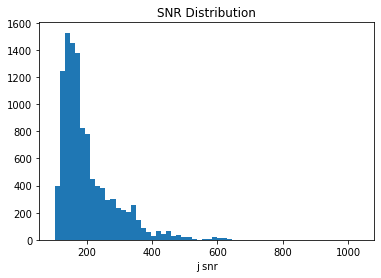

In [143]:
fig, axe = plt.subplots()
axe.hist(BinDF_hig_d['J_SNR'],bins=60)
plt.xlabel('j snr')
plt.title('SNR Distribution')

In [144]:
start = time.time()
clfhig_d, data_hig_d = binary_multiOutput_classifier(BinDF_hig_d,difference=True,max_depth=25,n_estimators=50,testdata=True)
end = time.time()
print(end-start)

219.41578602790833


In [145]:
yput1 = []
yput2 = []
for i in data_hig_d['y_test']:
    yput1.append(i[0])
    yput2.append(i[1])
data_hig_d_df = pd.DataFrame(data_hig_d['x_test'])
data_hig_d_df['prim']=yput1
data_hig_d_df['seco']=yput2
data_hig_d_df.to_csv('data/data_hig_d_Bard_50est.csv',index=False)

In [146]:
x_test_hig_d = data_hig_d['x_test']
y_test_hig_d = data_hig_d['y_test']

In [147]:
joblib.dump(clfhig_d, 'MOclassifiers/MO_hig_d_Bard_50est.pkl')

['MOclassifiers/MO_hig_d_Bard_50est.pkl']

In [148]:
# MO_hig_d = joblib.load('MOclassifiers/MO_hig_d_Bard_50est.pkl')

In [149]:
# df_data_hig_d = pd.read_csv(r'data/data_hig_d.csv')
# x_test_hig_d = [[df_data_hig_d[str(col)][i] for col in range(818)] for i in range(len(df_data_hig_d))]
# y_test_hig_d = [[df_data_hig_d['prim'][i],df_data_hig_d['seco'][i]] for i in range(len(df_data_hig_d))]

In [150]:
start = time.time()
df_avgdiffprim_hig_d, df_avgdiffseco_hig_d, df_stdprim_hig_d, df_stdseco_hig_d, predsprim_hig_d, predssec_hig_d, realprim_hig_d, realsec_hig_d = binaryPrecision(x_test_hig_d,y_test_hig_d,clfhig_d, predictions=True)
end = time.time()
print(end-start)

12.58711862564087


-0.0021173160173159926


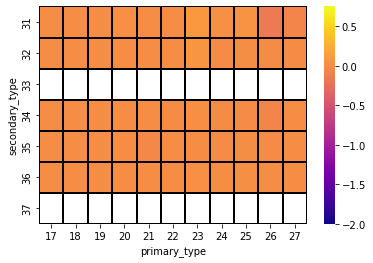

In [184]:
sns.heatmap(df_avgdiffprim_hig_d.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-2,vmax=0.75)
print(df_avgdiffprim_hig_d.mean(axis = 0, skipna = True).mean())

0.008586720303003052


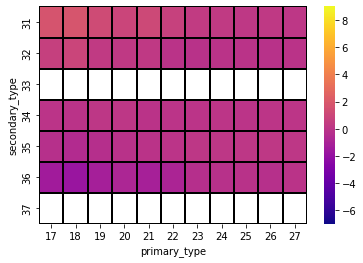

In [185]:
sns.heatmap(df_avgdiffseco_hig_d.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=-7,vmax=9)
print(df_avgdiffseco_hig_d.mean(axis = 0, skipna = True).mean())

0.18224844709381038


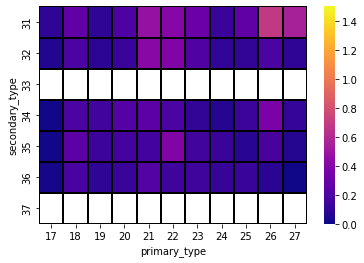

In [186]:
sns.heatmap(df_stdprim_hig_d.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=1.5)
print(df_stdprim_hig_d.mean(axis = 0, skipna = True).mean())

0.42525493673887027


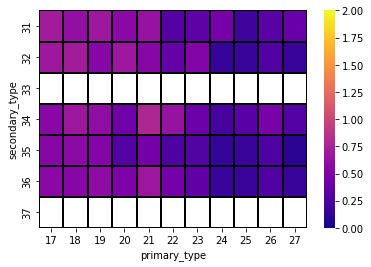

In [187]:
sns.heatmap(df_stdseco_hig_d.drop([16]+[i for i in range(28,40)],axis=1).drop([i for i in range(16,31)]+[38,39]),annot=False,linewidths=0.1,linecolor='black', cmap="plasma",vmin=0,vmax=2)
print(df_stdseco_hig_d.mean(axis = 0, skipna = True).mean())

{'primary_type': {'wavegrid': [0.9291509,
   1.0913042,
   2.077647,
   0.9291509,
   0.96179783,
   1.0913042,
   2.077647],
  'importance': [0.02173248424811806,
   0.36963417357613376,
   0.022537775006516443,
   0.03349481200287372,
   0.02537318559552358,
   0.35526037584391645,
   0.02169669352857603]},
 'secondary_type': {'wavegrid': [1.196399,
   1.2006752,
   1.2049553,
   1.3169771,
   1.3212926,
   1.424271,
   1.6226279,
   1.6266141,
   1.630594,
   1.6345673,
   1.6385341,
   1.6424943,
   1.6739404,
   1.7881606,
   2.0244722,
   1.1878585,
   1.196399,
   1.2006752,
   1.2049553,
   1.3169771,
   1.3212926,
   1.424271,
   1.618635,
   1.6226279,
   1.6266141,
   1.630594,
   1.6345673,
   1.6385341,
   1.6424943,
   2.0244722],
  'importance': [0.007907608330518623,
   0.007130962924846265,
   0.07436095730080744,
   0.008742101875062205,
   0.004395999249223243,
   0.006208433786979335,
   0.02617926419381611,
   0.031340894197295584,
   0.022914250977442926,
   0.006

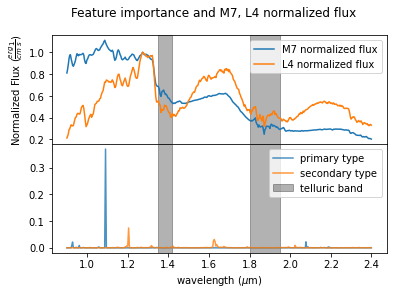

In [155]:
fig, ax = plt.subplots(2,1,sharex=True)


ax[0].plot(wavegrid,f17hig)
ax[0].plot(wavegrid,f24hig)
ax[0].set_ylabel('Normalized Flux ($\\frac{erg}{cm}\\frac{1}{s}$)')
ax[0].legend(['M7 normalized flux','L4 normalized flux'])

feat_impts_hig_d = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in clfhig_d.estimators_:
    ax[1].plot(wavegrid,clf.feature_importances_[:409], alpha=0.8)
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        wavegrid2 = list(wavegrid)+list(wavegrid)
        dd.append(wavegrid2[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)

ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].legend(['primary type', 'secondary type', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7, L4 normalized flux')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_hig_d['primary_type']['wavegrid'] = ddd[0]
feat_impts_hig_d['primary_type']['importance'] = eee[0]
feat_impts_hig_d['secondary_type']['wavegrid'] = ddd[1]
feat_impts_hig_d['secondary_type']['importance'] = eee[1]
feat_impts_hig_d

{'primary_type': {'wavegrid': [0.9291509,
   1.0913042,
   2.077647,
   0.9291509,
   0.96179783,
   1.0913042,
   2.077647],
  'importance': [0.02173248424811806,
   0.36963417357613376,
   0.022537775006516443,
   0.03349481200287372,
   0.02537318559552358,
   0.35526037584391645,
   0.02169669352857603]},
 'secondary_type': {'wavegrid': [1.196399,
   1.2006752,
   1.2049553,
   1.3169771,
   1.3212926,
   1.424271,
   1.6226279,
   1.6266141,
   1.630594,
   1.6345673,
   1.6385341,
   1.6424943,
   1.6739404,
   1.7881606,
   2.0244722,
   1.1878585,
   1.196399,
   1.2006752,
   1.2049553,
   1.3169771,
   1.3212926,
   1.424271,
   1.618635,
   1.6226279,
   1.6266141,
   1.630594,
   1.6345673,
   1.6385341,
   1.6424943,
   2.0244722],
  'importance': [0.007907608330518623,
   0.007130962924846265,
   0.07436095730080744,
   0.008742101875062205,
   0.004395999249223243,
   0.006208433786979335,
   0.02617926419381611,
   0.031340894197295584,
   0.022914250977442926,
   0.006

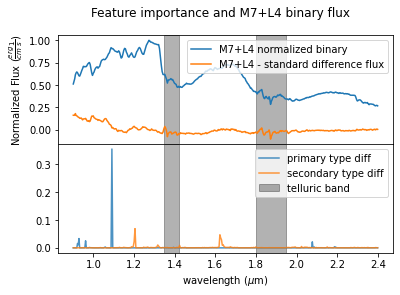

In [156]:
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(wavegrid,binhig)
ax[0].plot(wavegrid,dhig)
ax[0].set_ylabel('Normalized Flux ($\\frac{erg}{cm}\\frac{1}{s}$)')
ax[0].legend(['M7+L4 normalized binary','M7+L4 - standard difference flux'])

feat_impts_hig_d = {'primary_type':{},'secondary_type':{}}
ddd = []
eee = []
for clf in clfhig_d.estimators_:
    max_imp = max(clf.feature_importances_)
    dd = []
    ee = []
    for i in np.where(clf.feature_importances_ >= 0.05*max_imp)[0]:
        wavegrid2 = list(wavegrid)+list(wavegrid)
        dd.append(wavegrid2[i])
        ee.append(clf.feature_importances_[i])
    ddd.append(dd)
    eee.append(ee)

for clf in clfhig_d.estimators_:
    ax[1].plot(wavegrid,clf.feature_importances_[409:], alpha=0.8)

ax[0].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[1].axvspan(1.35,1.42, alpha=0.3, color='k')
ax[0].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].axvspan(1.80,1.95, alpha=0.3, color='k')
ax[1].legend(['primary type diff', 'secondary type diff', 'telluric band'])
plt.subplots_adjust(hspace=0)
fig.suptitle('Feature importance and M7+L4 binary flux')
plt.xlabel('wavelength ($\mu$m)')
feat_impts_hig_d['primary_type']['wavegrid'] = ddd[0]
feat_impts_hig_d['primary_type']['importance'] = eee[0]
feat_impts_hig_d['secondary_type']['wavegrid'] = ddd[1]
feat_impts_hig_d['secondary_type']['importance'] = eee[1]
feat_impts_hig_d

In [157]:
precisionprim_higd1, recallprim_higd1, f1_scoreprim_higd1, accuracyprim_higd1 = calculate_metrics(realprim_hig_d,predsprim_hig_d,1)
precisionsec_higd1, recallsec_higd1, f1_scoresec_higd1, accuracysec_higd1 = calculate_metrics(realsec_hig_d,predssec_hig_d,1)
precisionprim_higd3, recallprim_higd3, f1_scoreprim_higd3, accuracyprim_higd3 = calculate_metrics(realprim_hig_d,predsprim_hig_d,3)
precisionsec_higd3, recallsec_higd3, f1_scoresec_higd3, accuracysec_higd3 = calculate_metrics(realsec_hig_d,predssec_hig_d,3)

In [158]:
with open('data/precisionprim_higd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_higd1, file)
with open('data/recallprim_higd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_higd1, file)
with open('data/f1_scoreprim_higd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_higd1, file)
with open('data/accuracyprim_higd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_higd1, file)

In [159]:
with open('data/precisionsec_higd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_higd1, file)
with open('data/recallsec_higd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_higd1, file)
with open('data/f1_scoresec_higd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_higd1, file)
with open('data/accuracysec_higd1_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_higd1, file)

In [160]:
with open('data/precisionprim_higd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionprim_higd3, file)
with open('data/recallprim_higd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallprim_higd3, file)
with open('data/f1_scoreprim_higd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoreprim_higd3, file)
with open('data/accuracyprim_higd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracyprim_higd3, file)

In [161]:
with open('data/precisionsec_higd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(precisionsec_higd3, file)
with open('data/recallsec_higd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(recallsec_higd3, file)
with open('data/f1_scoresec_higd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(f1_scoresec_higd3, file)
with open('data/accuracysec_higd3_Bard_50est.pickle', 'wb') as file:
    pickle.dump(accuracysec_higd3, file)